In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

3.1 Problem - 1: Getting Started with Data Exploration:
1. Data Exploration and Understanding

- Dataset Overview

1. Load the dataset and display the first 10 rows.

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/csv_files/WorldHapinessReport.csv")
dataframe.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [ ]:
print(dataframe.shape)

(143, 9)


3. List all the columns and their data types.

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
mean_score = dataframe['score'].mean()
median_score = dataframe['score'].median()
std_score = dataframe['score'].std()

print(f"Mean (score): {mean_score:.3f}")
print(f"Median (score): {median_score:.3f}")
print(f"Standard Deviation (score): {std_score:.3f}")

Mean (score): 5.528
Median (score): 5.785
Standard Deviation (score): 1.171


2. Identify the country with the highest and lowest happiness scores.

In [ ]:
max_country = dataframe.loc[dataframe['score'].idxmax()]
min_country = dataframe.loc[dataframe['score'].idxmin()]
print(f"Highest Score: {max_country['Country name']} (Score: {max_country['score']:.3f})")
print(f"Lowest Score: {min_country['Country name']} (Score: {min_country['score']:.3f})")

Highest Score: Finland (Score: 7.741)
Lowest Score: Afghanistan (Score: 1.721)


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column

In [ ]:
missing_counts = dataframe.isnull().sum()
print("Missing Values Count:")
print(missing_counts)

Missing Values Count:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5

In [ ]:
high_score_countries = dataframe[dataframe['score'] > 7.5]
print(high_score_countries)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows

In [ ]:
high_score_countries = dataframe[dataframe['score'] > 7.5]
sorted_high_score_countries = high_score_countries.sort_values(by='Log GDP per capita',ascending=False).head(10)

print(sorted_high_score_countries)

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:


            Low (Score < 4 )

            Medium (4 <= Score <= 6)

            High (Score > 6)

In [ ]:
import numpy as np

conditions = [
    (dataframe['score'] < 4),
    (dataframe['score'] >= 4) & (dataframe['score'] <= 6),
    (dataframe['score'] > 6)
]
choices = ['Low', 'Medium', 'High']
dataframe['Happiness Category'] = np.select(conditions, choices, default='N/A')
dataframe.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart

Bar chart saved as top_10_happiest_countries_bar_chart_simple.png


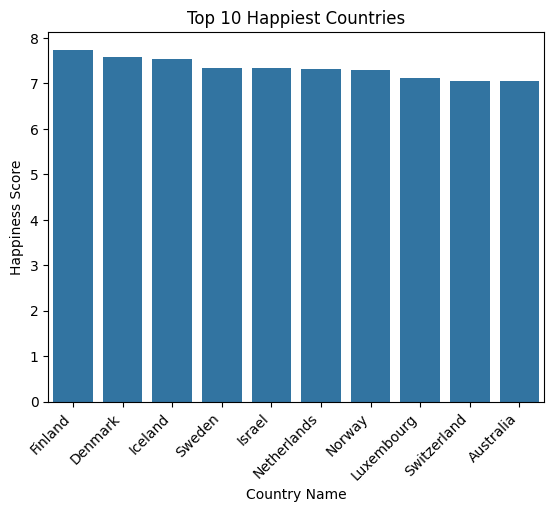

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_happiest = dataframe.sort_values(by='score', ascending=False).head(10)

plt.figure()
sns.barplot(
    x='Country name',
    y='score',
    data=top_10_happiest,
)

plt.title('Top 10 Happiest Countries')
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.savefig('top_10_happiest_countries_bar_chart_simple.png')
print("Bar chart saved as top_10_happiest_countries_bar_chart_simple.png")

• Line Plot:

  Plot the top 10 unhappiest countries by Score using a Line chart.

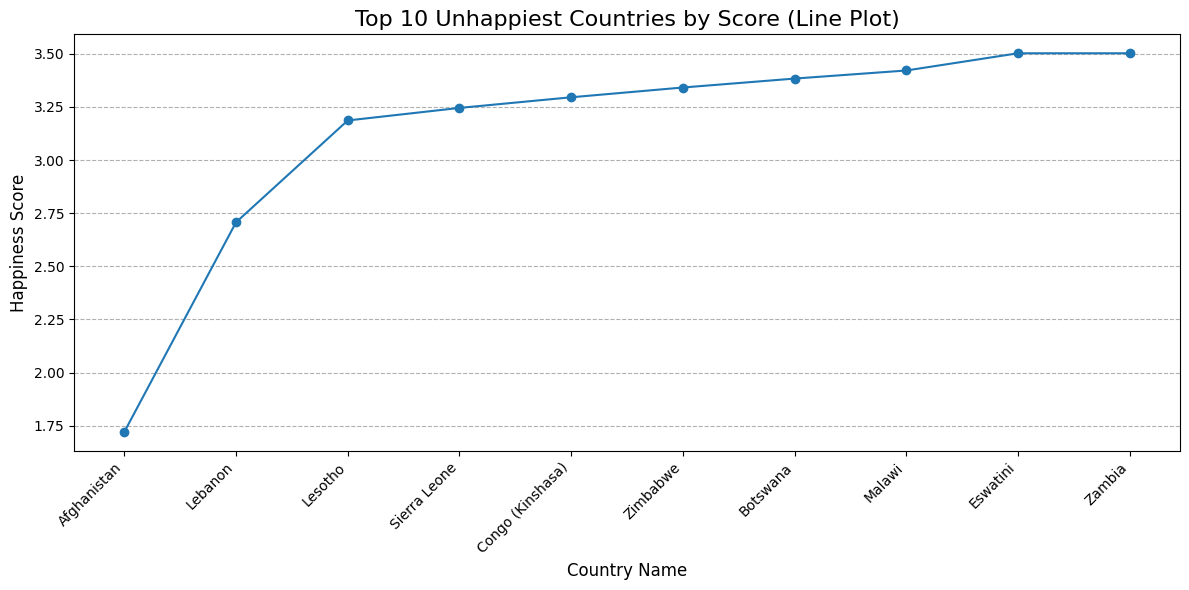

In [ ]:
import matplotlib.pyplot as plt

bottom_10_unhappiest = dataframe.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(12, 6))
plt.plot(
    bottom_10_unhappiest['Country name'],
    bottom_10_unhappiest['score'],
    marker='o',
    linestyle='-',

)

plt.title('Top 10 Unhappiest Countries by Score (Line Plot)', fontsize=16)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('top_10_unhappiest_countries_line_chart.png')

• Plot a histogram for the Score column to show its distribution and also interpret.

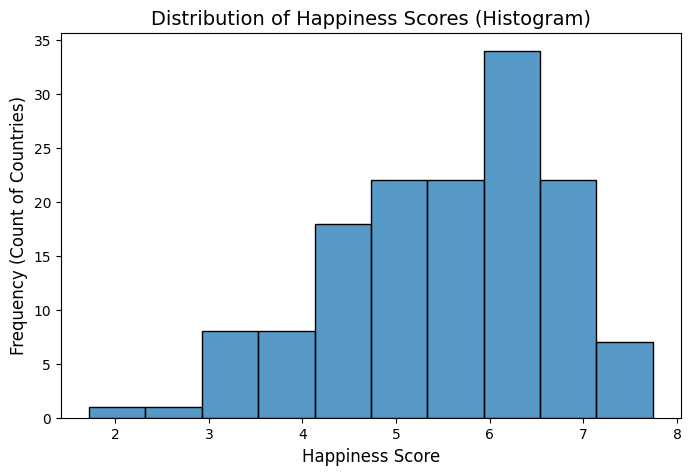

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(
    data=dataframe,
    x='score',
    bins=10,

)
plt.title('Distribution of Happiness Scores (Histogram)', fontsize=14)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency (Count of Countries)', fontsize=12)
plt.savefig('score_distribution_histogram.png')

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

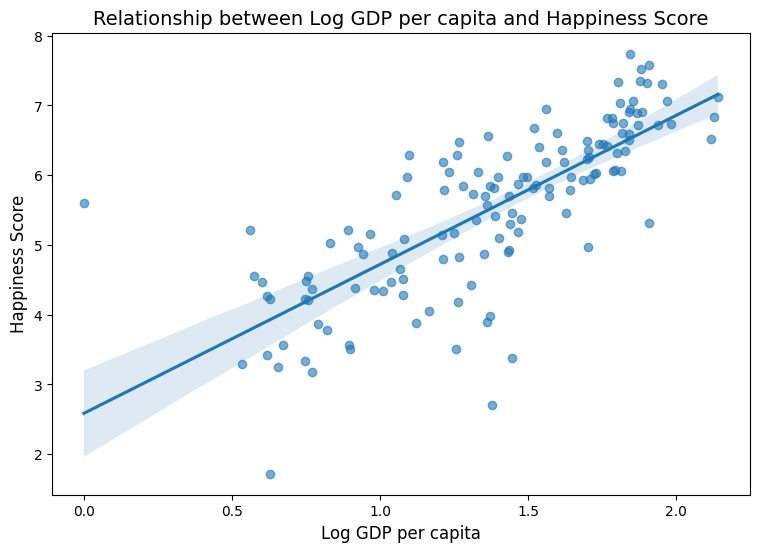

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.regplot(
    data=dataframe,
    x='Log GDP per capita',
    y='score',
    scatter_kws={'alpha':0.6},
)
plt.title('Relationship between Log GDP per capita and Happiness Score', fontsize=14)
plt.xlabel('Log GDP per capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.savefig('gdp_vs_score_scatter_plot.png')

3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asia_df = dataframe[dataframe['Country name'].isin(south_asian_countries)]
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
south_asia_df.to_csv("south_asia_happiness.csv", index=False)

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support
+ 0.30 × Healthy Life Expectancy

In [ ]:
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)
print(south_asia_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Composite Score']])

    Country name  Log GDP per capita  Social support  Healthy life expectancy  \
92         Nepal               0.965           0.990                    0.443   
107     Pakistan               1.069           0.600                    0.321   
125        India               1.166           0.653                    0.417   
128   Bangladesh               1.122           0.249                    0.513   
142  Afghanistan               0.628           0.000                    0.242   

     Composite Score  
92            0.8159  
107           0.7039  
125           0.7874  
128           0.6774  
142           0.3238  


/tmp/ipython-input-2598759774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
ranked_south_asia = south_asia_df.sort_values(
    by='Composite Score',
    ascending=False
)

print(ranked_south_asia[['Country name', 'Composite Score', 'score', 'Happiness Category']])

    Country name  Composite Score  score Happiness Category
92         Nepal           0.8159  5.158             Medium
125        India           0.7874  4.054             Medium
107     Pakistan           0.7039  4.657             Medium
128   Bangladesh           0.6774  3.886                Low
142  Afghanistan           0.3238  1.721                Low


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

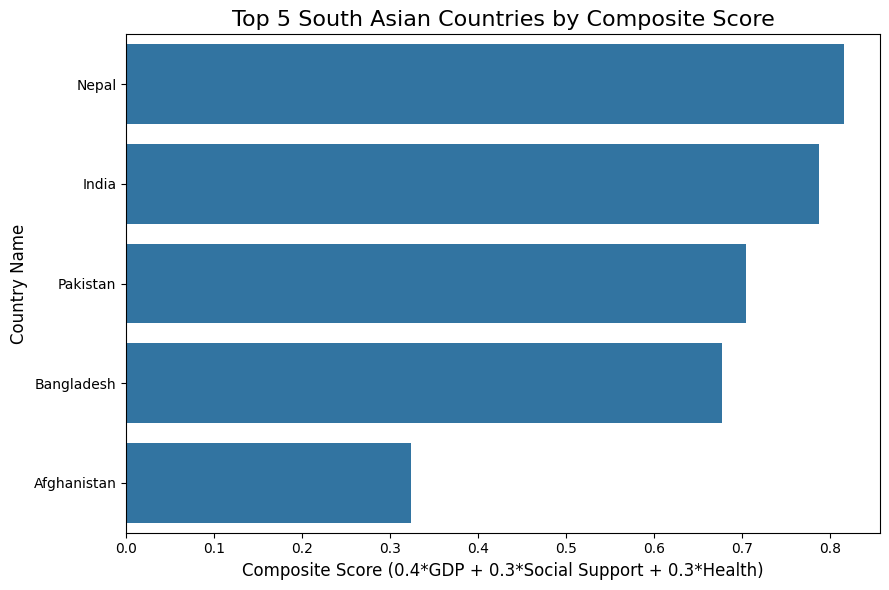

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_composite = south_asia_df.sort_values(
    by='Composite Score',
    ascending=False
).head(5)

plt.figure(figsize=(9, 6))
sns.barplot(
    x='Composite Score',
    y='Country name',
    data=top_5_composite,
)
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=16)
plt.xlabel('Composite Score (0.4*GDP + 0.3*Social Support + 0.3*Health)', fontsize=12)
plt.ylabel('Country Name', fontsize=12)
plt.tight_layout()
plt.savefig('south_asia_composite_score_bar_chart.png')

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

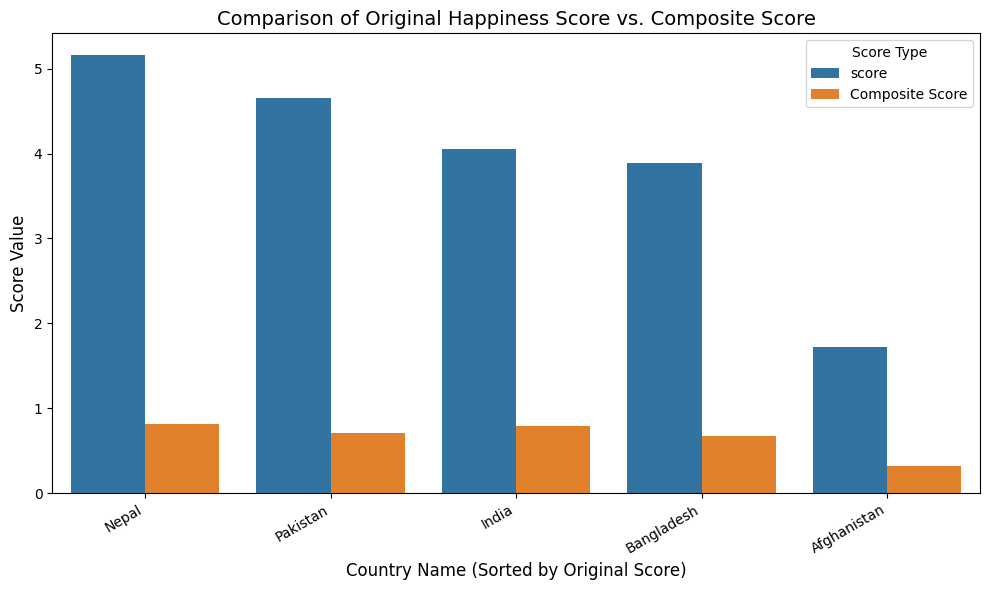

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df = south_asia_df[['Country name', 'score', 'Composite Score']].sort_values(
    by='score',
    ascending=False
)
melted_df = comparison_df.melt(
    id_vars='Country name',
    value_vars=['score', 'Composite Score'],
    var_name='Score Type',
    value_name='Value'
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Country name',
    y='Value',
    hue='Score Type',
    data=melted_df,
)
plt.title('Comparison of Original Happiness Score vs. Composite Score', fontsize=14)
plt.xlabel('Country Name (Sorted by Original Score)', fontsize=12)
plt.ylabel('Score Value', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Score Type')
plt.tight_layout()
plt.savefig('score_vs_composite_comparison_bar_chart.png')

Task - 3 - Outlier Detection:

Tasks:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.


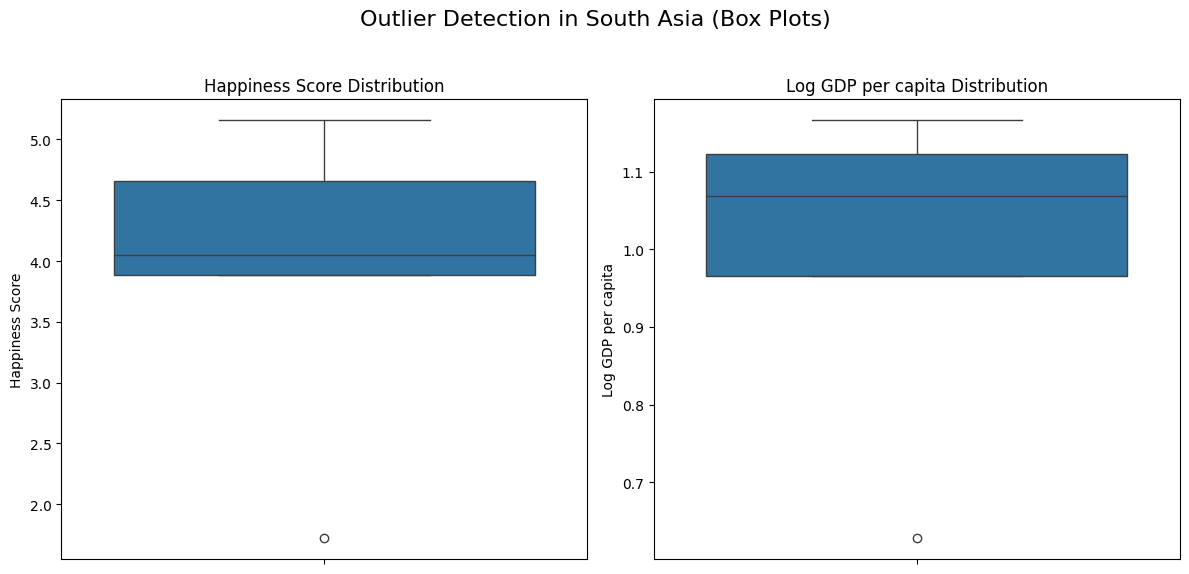

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Outlier Detection in South Asia (Box Plots)', fontsize=16)

sns.boxplot(y=south_asia_df['score'], ax=axes[0],)
axes[0].set_title('Happiness Score Distribution')
axes[0].set_ylabel('Happiness Score')
sns.boxplot(y=south_asia_df['Log GDP per capita'], ax=axes[1],)
axes[1].set_title('Log GDP per capita Distribution')
axes[1].set_ylabel('Log GDP per capita')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('south_asia_outlier_detection_boxplots.png')

2. Define outliers using the 1.5 × IQR rule.

In [ ]:
def define_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

score_lb, score_ub = define_outliers(south_asia_df, 'score')
gdp_lb, gdp_ub = define_outliers(south_asia_df, 'Log GDP per capita')

print(f"Score Lower Bound: {score_lb:.3f}")
print(f"Score Upper Bound: {score_ub:.3f}")

Score Lower Bound: 2.730
Score Upper Bound: 5.813


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

/tmp/ipython-input-2105485675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Is Outlier'] = south_asia_df['Country name'].apply(


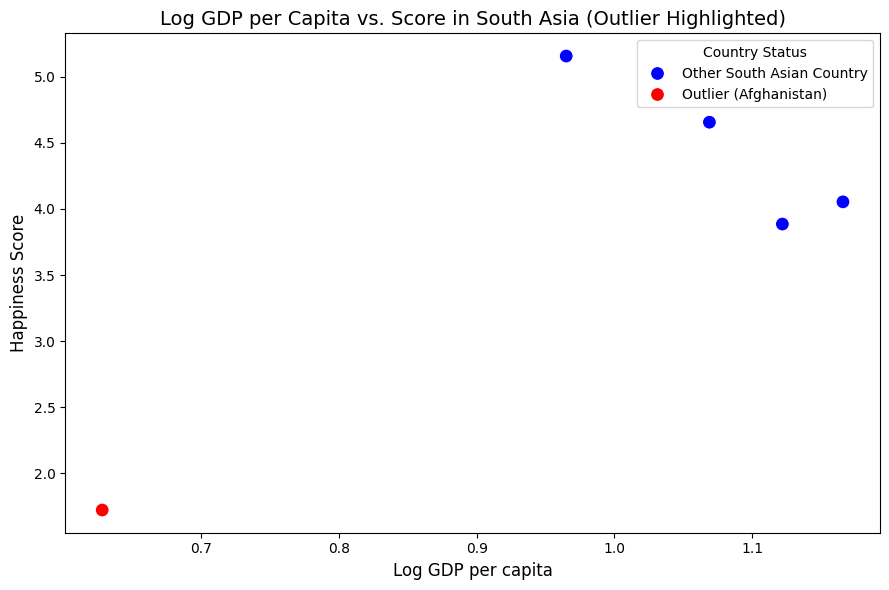

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

south_asia_df['Is Outlier'] = south_asia_df['Country name'].apply(
    lambda x: 'Outlier (Afghanistan)' if x == 'Afghanistan' else 'Other South Asian Country'
)

plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=south_asia_df,
    x='Log GDP per capita',
    y='score',
    hue='Is Outlier',
    palette={'Outlier (Afghanistan)': 'red', 'Other South Asian Country': 'blue'},
    s=100
)

plt.title('Log GDP per Capita vs. Score in South Asia (Outlier Highlighted)', fontsize=14)
plt.xlabel('Log GDP per capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Country Status')
plt.tight_layout()
plt.savefig('south_asia_outlier_scatter_plot.png')

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [ ]:
correlation_matrix = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']].corr(method='pearson')

print(f"Freedom to make life choices and Score: {correlation_matrix.loc['Freedom to make life choices', 'score']:.4f}")
print(f"Generosity and Score: {correlation_matrix.loc['Generosity', 'score']:.4f}")

Freedom to make life choices and Score: 0.8015
Generosity and Score: 0.8773


2. Create scatter plots with trendlines for these metrics against the Score.

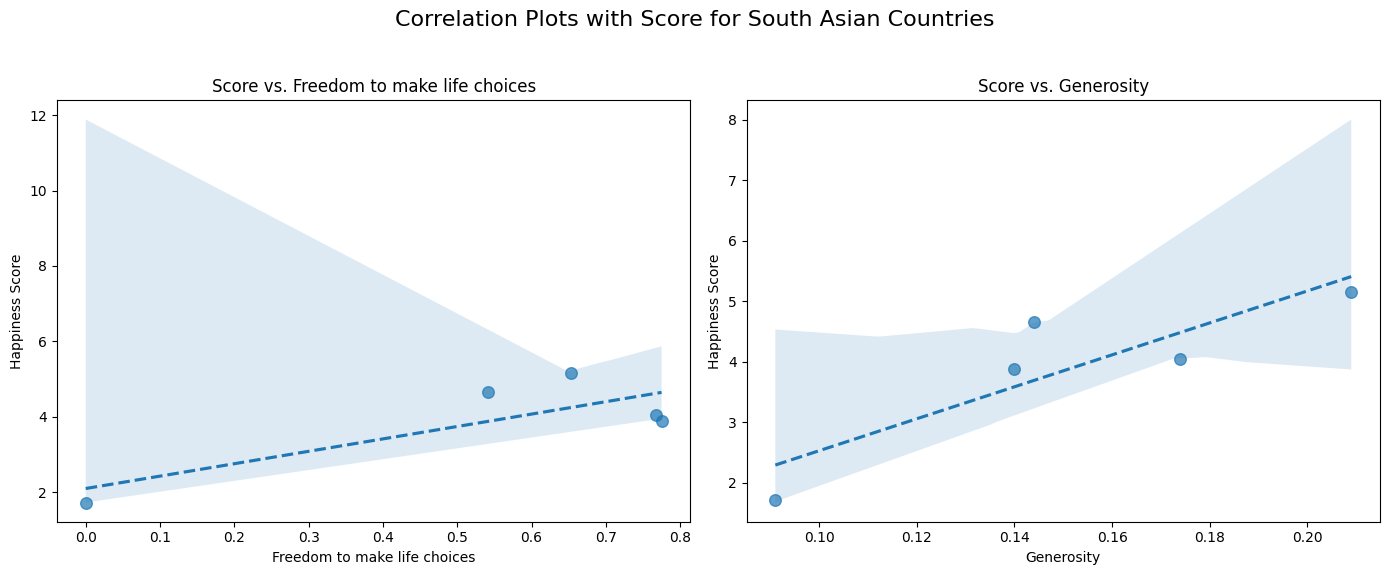

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['Freedom to make life choices', 'Generosity']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Correlation Plots with Score for South Asian Countries', fontsize=16)
sns.regplot(
    data=south_asia_df,
    x=metrics[0],
    y='score',
    ax=axes[0],
    scatter_kws={ 'alpha': 0.7, 's': 70},
    line_kws={'linestyle': '--'}
)
axes[0].set_title(f'Score vs. {metrics[0]}')
axes[0].set_xlabel(metrics[0])
axes[0].set_ylabel('Happiness Score')

sns.regplot(
    data=south_asia_df,
    x=metrics[1],
    y='score',
    ax=axes[1],
    scatter_kws={ 'alpha': 0.7, 's': 70},
    line_kws={ 'linestyle': '--'}
)
axes[1].set_title(f'Score vs. {metrics[1]}')
axes[1].set_xlabel(metrics[1])
axes[1].set_ylabel('Happiness Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('south_asia_score_trends_scatter_plots.png')

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
print(south_asia_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093


/tmp/ipython-input-259189109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


2. Rank the South Asian countries by this gap in both ascending and descending order

In [ ]:
ascending_rank = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
print("--- Ranking by GDP-Score Gap (Ascending Order) ---")
print(ascending_rank[['Country name', 'GDP-Score Gap', 'Log GDP per capita', 'score']])

descending_rank = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
print("\n--- Ranking by GDP-Score Gap (Descending Order) ---")
print(descending_rank[['Country name', 'GDP-Score Gap', 'Log GDP per capita', 'score']])

--- Ranking by GDP-Score Gap (Ascending Order) ---
    Country name  GDP-Score Gap  Log GDP per capita  score
92         Nepal         -4.193               0.965  5.158
107     Pakistan         -3.588               1.069  4.657
125        India         -2.888               1.166  4.054
128   Bangladesh         -2.764               1.122  3.886
142  Afghanistan         -1.093               0.628  1.721

--- Ranking by GDP-Score Gap (Descending Order) ---
    Country name  GDP-Score Gap  Log GDP per capita  score
142  Afghanistan         -1.093               0.628  1.721
128   Bangladesh         -2.764               1.122  3.886
125        India         -2.888               1.166  4.054
107     Pakistan         -3.588               1.069  4.657
92         Nepal         -4.193               0.965  5.158


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

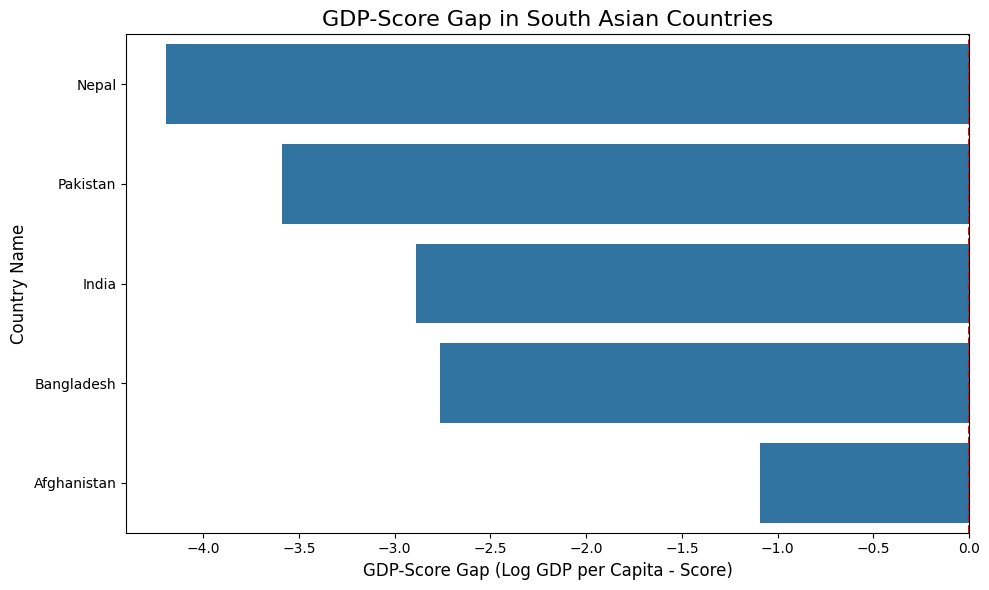

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

gap_sorted_df = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='GDP-Score Gap',
    y='Country name',
    data=gap_sorted_df,
)

plt.axvline(x=0, color='red', linestyle='--')
plt.title('GDP-Score Gap in South Asian Countries', fontsize=16)
plt.xlabel('GDP-Score Gap (Log GDP per Capita - Score)', fontsize=12)
plt.ylabel('Country Name', fontsize=12)
plt.tight_layout()
plt.savefig('south_asia_gdp_score_gap_bar_chart.png')

4. Analyze the reasons behind these gaps and their implications for South Asian countries.
5
Due:07 Dec

Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

In [ ]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]
middle_east_df = dataframe[dataframe['Country name'].isin(middle_east_countries)].copy()

print(middle_east_df)

             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [ ]:
south_asia_stats = south_asia_df['score'].agg(['mean', 'std'])
middle_east_stats = middle_east_df['score'].agg(['mean', 'std'])
comparison_stats = pd.DataFrame({
    'South Asia': south_asia_stats,
    'Middle East': middle_east_stats
})

print(comparison_stats.round(3))

      South Asia  Middle East
mean       3.895        5.412
std        1.316        1.566


• Which region has higher happiness Scores on average?

    The Middle East region has significantly higher happiness Scores on average than South Asia.

    Middle East (Mean Score): 5.412

    South Asia (Mean Score): 3.895

2. Top and Bottom Performers:

   • Identify the top 3 and bottom 3 countries in each region   based     on the score.




In [ ]:
sa_top3 = south_asia_df.nlargest(3, 'score')[['Country name', 'score']]
sa_bottom3 = south_asia_df.nsmallest(3, 'score')[['Country name', 'score']]

print("South Asia Performers (Score)")
print("Top 3 Countries in South Asia:")
print(sa_top3, "\n")
print("Bottom 3 Countries in South Asia:")
print(sa_bottom3, "\n")

me_top3 = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
me_bottom3 = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]

print("Middle East Performers (Score)")
print("Top 3 Countries in Middle East:")
print(me_top3, "\n")
print("Bottom 3 Countries in Middle East:")
print(me_bottom3, "\n")

South Asia Performers (Score)
Top 3 Countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054 

Bottom 3 Countries in South Asia:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
125        India  4.054 

Middle East Performers (Score)
Top 3 Countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733 

Bottom 3 Countries in Middle East:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186 



• Plot bar charts comparing these charts.

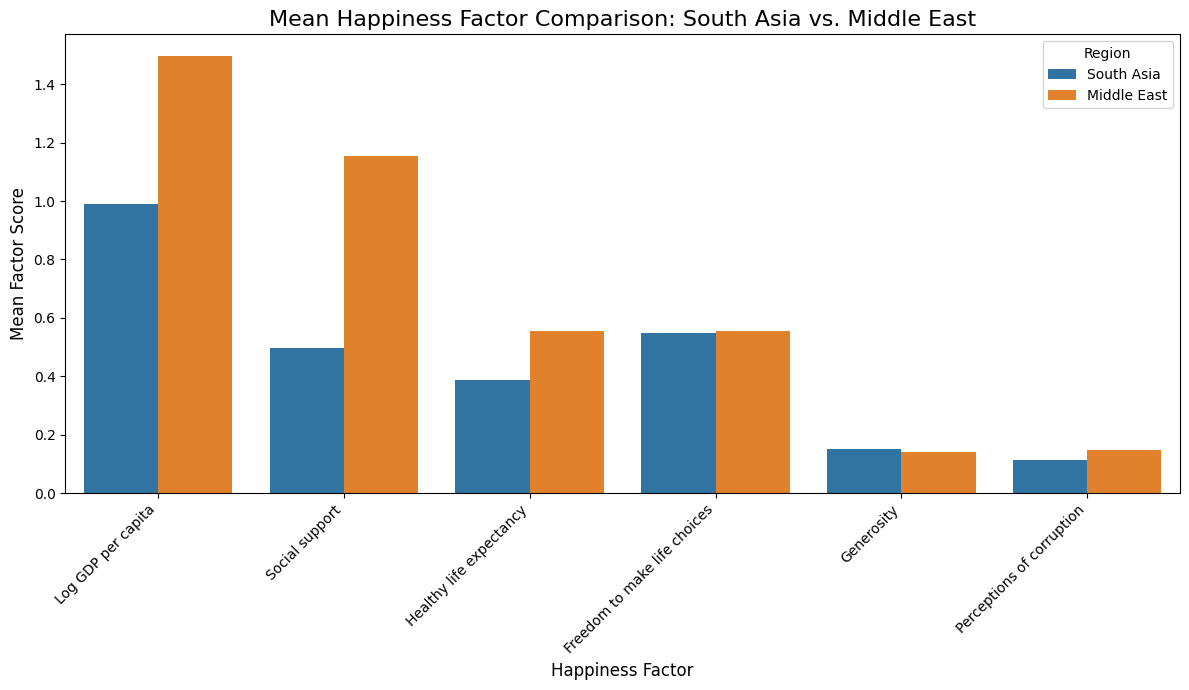

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

factors = [
    'Log GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'
]

sa_means = south_asia_df[factors].mean().rename('South Asia')
me_means = middle_east_df[factors].mean().rename('Middle East')
factor_comparison = pd.concat([sa_means, me_means], axis=1).reset_index().rename(columns={'index': 'Factor'})
melted_factors = factor_comparison.melt(id_vars='Factor', var_name='Region', value_name='Mean Value')
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Factor',
    y='Mean Value',
    hue='Region',
    data=melted_factors,
)
plt.title('Mean Happiness Factor Comparison: South Asia vs. Middle East', fontsize=16)
plt.xlabel('Happiness Factor', fontsize=12)
plt.ylabel('Mean Factor Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.savefig('factor_comparison_bar_chart.png')

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

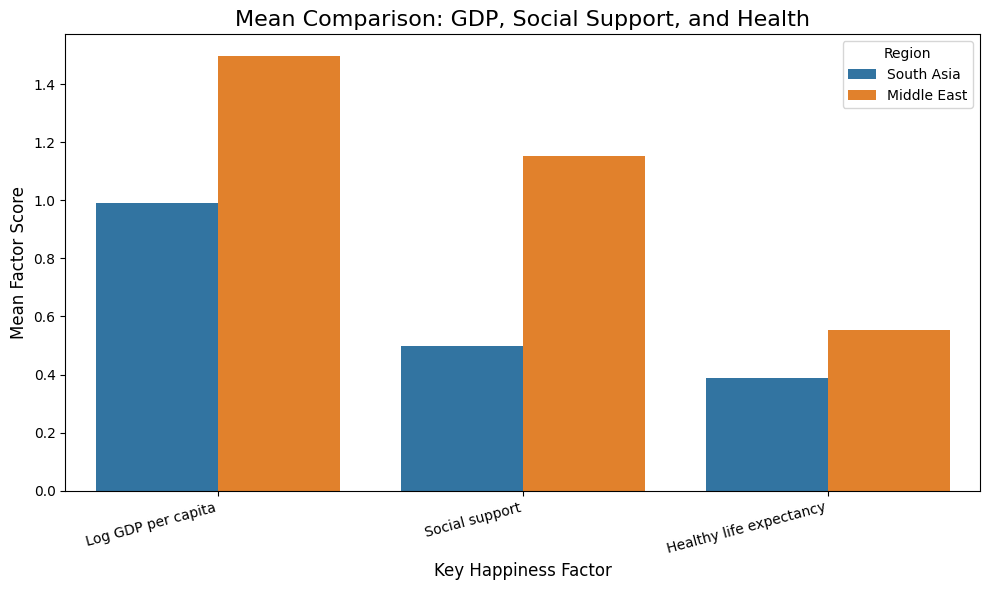

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

specific_factors = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
sa_means = south_asia_df[specific_factors].mean().rename('South Asia')
me_means = middle_east_df[specific_factors].mean().rename('Middle East')
comparison_specific = pd.concat([sa_means, me_means], axis=1).reset_index().rename(columns={'index': 'Factor'})
melted_specific = comparison_specific.melt(id_vars='Factor', var_name='Region', value_name='Mean Value')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Factor',
    y='Mean Value',
    hue='Region',
    data=melted_specific,
)
plt.title('Mean Comparison: GDP, Social Support, and Health', fontsize=16)
plt.xlabel('Key Happiness Factor', fontsize=12)
plt.ylabel('Mean Factor Score', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.savefig('gdp_social_health_comparison_bar_chart.png')

•  Which metrics show the largest disparity between the two regions?

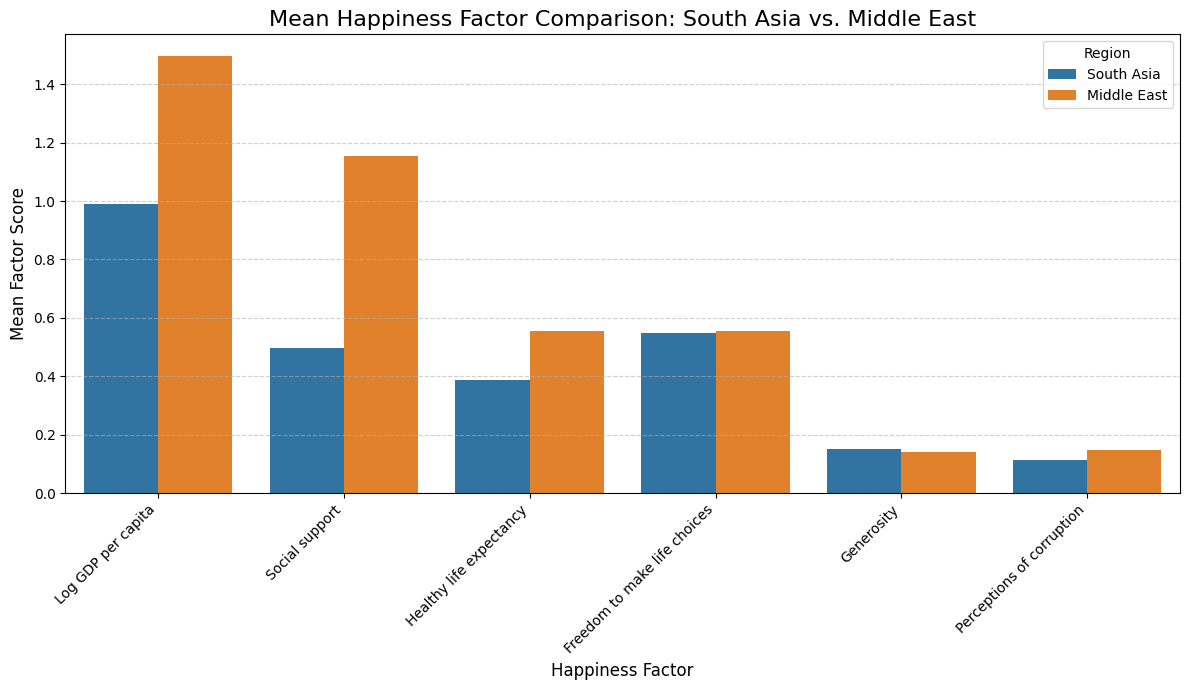

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

factors = [
    'Log GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'
]

sa_means = south_asia_df[factors].mean().rename('South Asia')
me_means = middle_east_df[factors].mean().rename('Middle East')


factor_comparison = pd.concat([sa_means, me_means], axis=1).reset_index()
factor_comparison = factor_comparison.rename(columns={'index': 'Factor'})

melted_factors = factor_comparison.melt(
    id_vars='Factor',
    var_name='Region',
    value_name='Mean Value'
)

plt.figure(figsize=(12, 7))
sns.barplot(
    x='Factor',
    y='Mean Value',
    hue='Region',
    data=melted_factors,
)

plt.title('Mean Happiness Factor Comparison: South Asia vs. Middle East', fontsize=16)
plt.xlabel('Happiness Factor', fontsize=12)
plt.ylabel('Mean Factor Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('factor_comparison_bar_chart.png')

4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [ ]:
sa_stats = south_asia_df['score'].agg(['min', 'max', 'mean', 'std'])
me_stats = middle_east_df['score'].agg(['min', 'max', 'mean', 'std'])

sa_range = sa_stats['max'] - sa_stats['min']
me_range = me_stats['max'] - me_stats['min']
sa_cv = sa_stats['std'] / sa_stats['mean']
me_cv = me_stats['std'] / me_stats['mean']



•  Which region has greater variability in happiness?

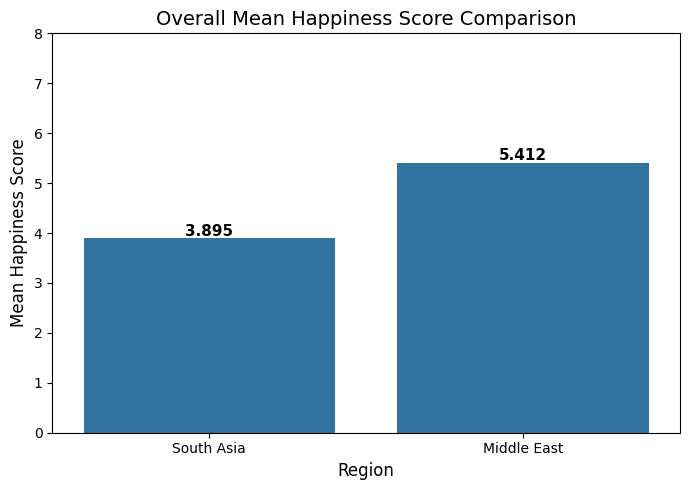

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


sa_mean_score = south_asia_df['score'].mean()
me_mean_score = middle_east_df['score'].mean()


comparison_data = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'Mean Score': [sa_mean_score, me_mean_score]
})


plt.figure(figsize=(7, 5))
sns.barplot(
    x='Region',
    y='Mean Score',
    data=comparison_data,
)


for index, row in comparison_data.iterrows():
    plt.text(
        index,
        row['Mean Score'] + 0.05,
        f"{row['Mean Score']:.3f}",
        ha="center",
        fontsize=11,
        weight='bold'
    )

plt.title('Overall Mean Happiness Score Comparison', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Mean Happiness Score', fontsize=12)
plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('overall_mean_score_comparison.png')

5. Correlation Analysis:


• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

In [ ]:

sa_stats = south_asia_df['score'].agg(['min', 'max', 'mean', 'std'])
me_stats = middle_east_df['score'].agg(['min', 'max', 'mean', 'std'])


sa_range = sa_stats['max'] - sa_stats['min']
sa_cv = sa_stats['std'] / sa_stats['mean']
me_range = me_stats['max'] - me_stats['min']
me_cv = me_stats['std'] / me_stats['mean']


final_summary = pd.DataFrame({
    'Metric': [
        'Mean Score (Average Happiness)',
        'Range (Absolute Disparity)',
        'CV (Relative Variability)'
    ],
    'South Asia': [sa_stats['mean'], sa_range, sa_cv],
    'Middle East': [me_stats['mean'], me_range, me_cv]
})

print("--- Final Comparative Summary Table (Score Metrics) ---")
print(final_summary.round(4))

--- Final Comparative Summary Table (Score Metrics) ---
                           Metric  South Asia  Middle East
0  Mean Score (Average Happiness)      3.8952       5.4121
1      Range (Absolute Disparity)      3.4370       4.6340
2       CV (Relative Variability)      0.3379       0.2894


•  Create scatter plots to visualize and interpret the relationships.

/tmp/ipython-input-309989517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Region'] = 'South Asia'


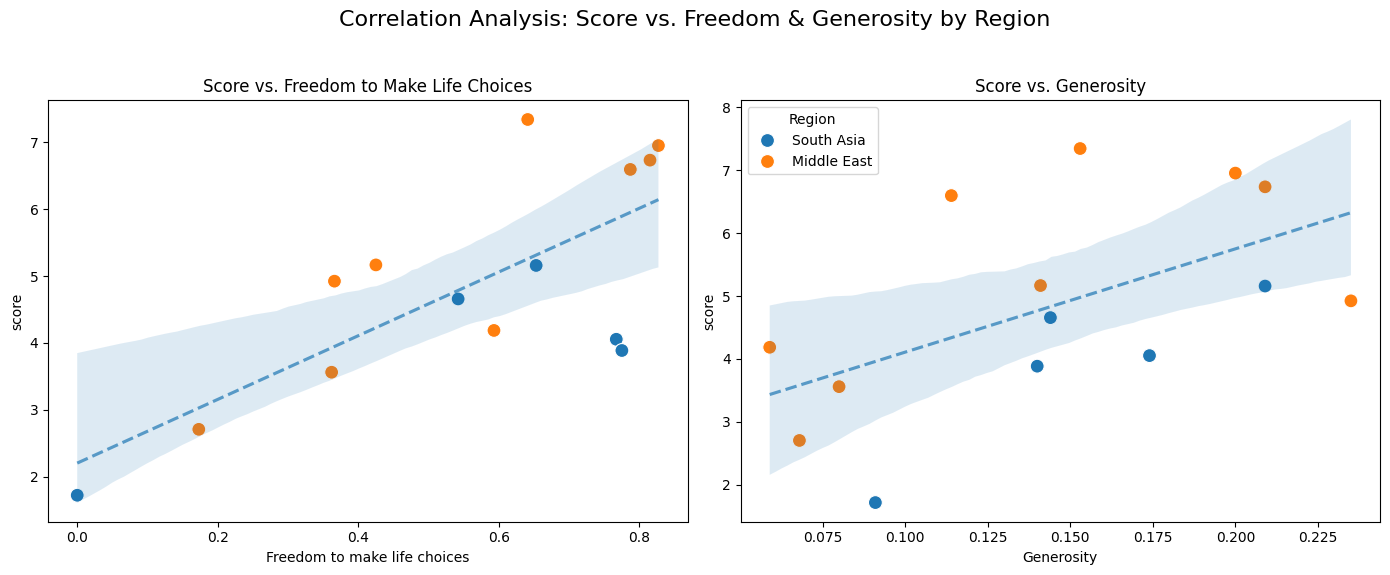

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


south_asia_df['Region'] = 'South Asia'
middle_east_df['Region'] = 'Middle East'
comparative_df = pd.concat([south_asia_df, middle_east_df])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Correlation Analysis: Score vs. Freedom & Generosity by Region', fontsize=16)

sns.scatterplot(data=comparative_df, x='Freedom to make life choices', y='score',
                hue='Region',  s=100, ax=axes[0])
sns.regplot(data=comparative_df, x='Freedom to make life choices', y='score', scatter=False,
            line_kws={'linestyle': '--', 'alpha': 0.7}, ax=axes[0])
axes[0].set_title('Score vs. Freedom to Make Life Choices')


sns.scatterplot(data=comparative_df, x='Generosity', y='score',
                hue='Region', s=100, ax=axes[1])
sns.regplot(data=comparative_df, x='Generosity', y='score', scatter=False,
            line_kws={ 'linestyle': '--', 'alpha': 0.7}, ax=axes[1])
axes[1].set_title('Score vs. Generosity')


axes[0].get_legend().remove()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cross_regional_correlation_scatter_plots.png')

6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

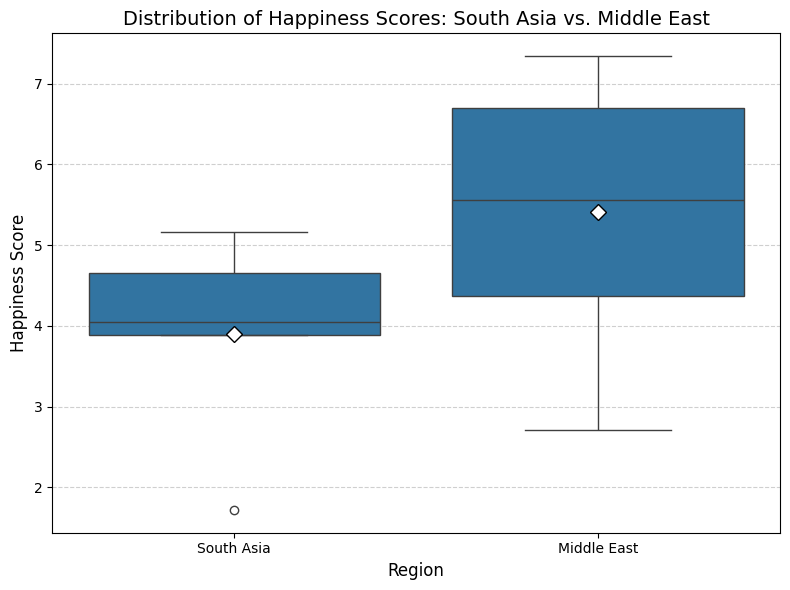

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Region',
    y='score',
    data=comparative_df,
    showmeans=True,
    meanprops={"marker":"D", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"}
)
plt.title('Distribution of Happiness Scores: South Asia vs. Middle East', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('final_score_distribution_box_plot.png')

• Plot these outliers and discuss their implications.

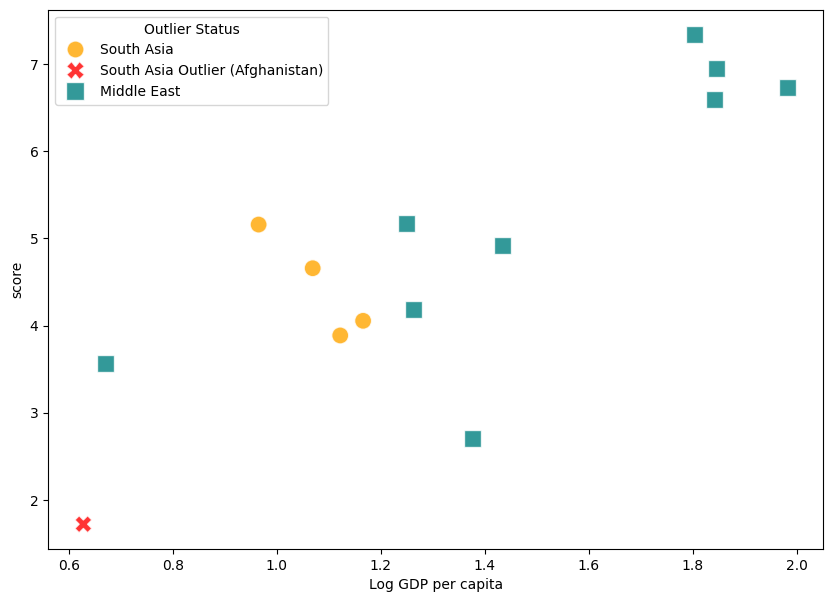

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

comparative_df['Outlier Status'] = np.where(
    comparative_df['Country name'] == 'Afghanistan',
    'South Asia Outlier (Afghanistan)',
    comparative_df['Region']
)


plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=comparative_df,
    x='Log GDP per capita',
    y='score',
    hue='Outlier Status',
    style='Outlier Status',
    palette={
        'South Asia': 'orange',
        'Middle East': 'teal',
        'South Asia Outlier (Afghanistan)': 'red'
    },
    markers={
        'South Asia': 'o',
        'Middle East': 's',
        'South Asia Outlier (Afghanistan)': 'X'
    },
    s=150,
    alpha=0.8
)
plt.savefig('outlier_analysis_gdp_score_comparison.png')

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

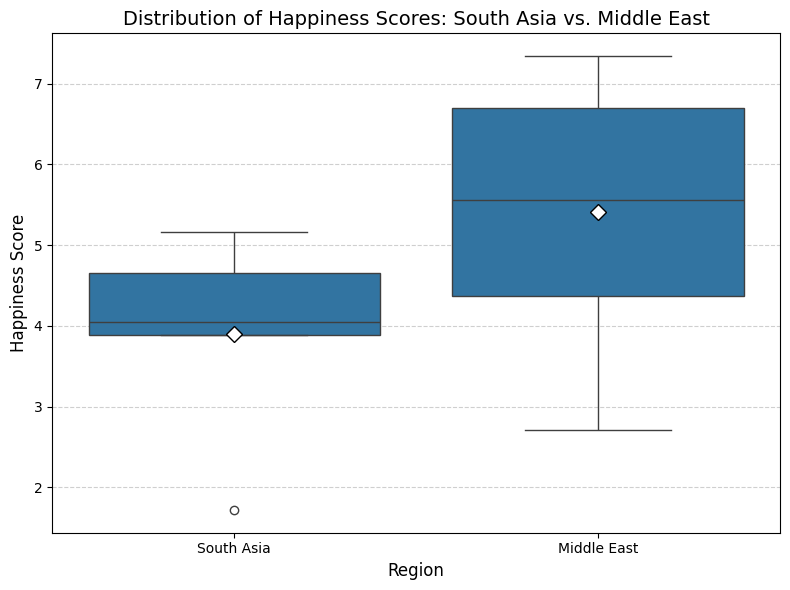

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Region',
    y='score',
    data=comparative_df,
    showmeans=True,
    meanprops={"marker":"D", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"}
)
plt.title('Distribution of Happiness Scores: South Asia vs. Middle East', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('final_score_distribution_box_plot.png')

• Interpret the key differences in distribution shapes, medians, and outliers.

In [ ]:

final_corr_summary = pd.DataFrame({
    'Metric': ['Freedom to make life choices', 'Generosity'],
    'South Asia (r)': [0.8015, 0.8773],
    'Middle East (r)': [0.8632, 0.6275]
})

print("Final Correlation Comparison Table (Score vs. Non-GDP Factors)")
print(final_corr_summary.round(4))

Final Correlation Comparison Table (Score vs. Non-GDP Factors)
                         Metric  South Asia (r)  Middle East (r)
0  Freedom to make life choices          0.8015           0.8632
1                    Generosity          0.8773           0.6275
